In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Paso 1: generar datos de prueba
# Leer los datos de sismos
df = pd.read_csv('Sismicidad_LosSantos_2.csv', encoding='latin-1')
print(df.head())

# Convertir la columna 'FECHA' a datetime si aún no lo está
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Definir las fechas de inicio y fin
fecha_inicio = '2016-12-01'  # Reemplaza con la fecha de inicio deseada
fecha_fin = '2016-12-31'    # Reemplaza con la fecha de fin deseada

# Filtrar el DataFrame
df_filtrado = df[(df['FECHA'] >= fecha_inicio) & (df['FECHA'] <= fecha_fin)]

dates = df_filtrado.FECHA.values
values = df_filtrado.MAGNITUD.values
#print('Fechas: ', dates)
#print('Magnitudes: ', values)
time_series = pd.Series(values, index=dates)
#print('Series de Tiempo: ', time_series)

        FECHA  HORA_UTC  LATITUD (grados)  LONGITUD (grados)  \
0  2016-11-01  00:29:45             6.815            -73.142   
1  2016-11-01  00:29:45             6.816            -73.143   
2  2016-11-01  01:47:03             6.825            -73.064   
3  2016-11-01  02:17:12             6.832            -73.149   
4  2016-11-01  02:29:14             6.798            -73.160   

   PROFUNDIDAD (Km)  MAGNITUD DEPARTAMENTO   MUNICIPIO  FASES  RMS (Seg)  \
0             144.7       2.9    SANTANDER  LOS_SANTOS     25        0.6   
1             144.6       2.9    SANTANDER  LOS_SANTOS     25        0.6   
2             146.0       1.1    SANTANDER  LOS_SANTOS      4        0.6   
3             150.4       1.3    SANTANDER  LOS_SANTOS      4        0.4   
4             145.9       2.1    SANTANDER  LOS_SANTOS     15        0.3   

   GAP (grados)  ERROR LATITUD (Km)  ERROR LONGITUD (Km)  \
0            71                 3.4                  3.5   
1            71                 3.5   

In [3]:
# Paso 2: División de datos
train_size = int(len(time_series) * 0.2)
train_data, test_data = time_series[:train_size], time_series[train_size:]

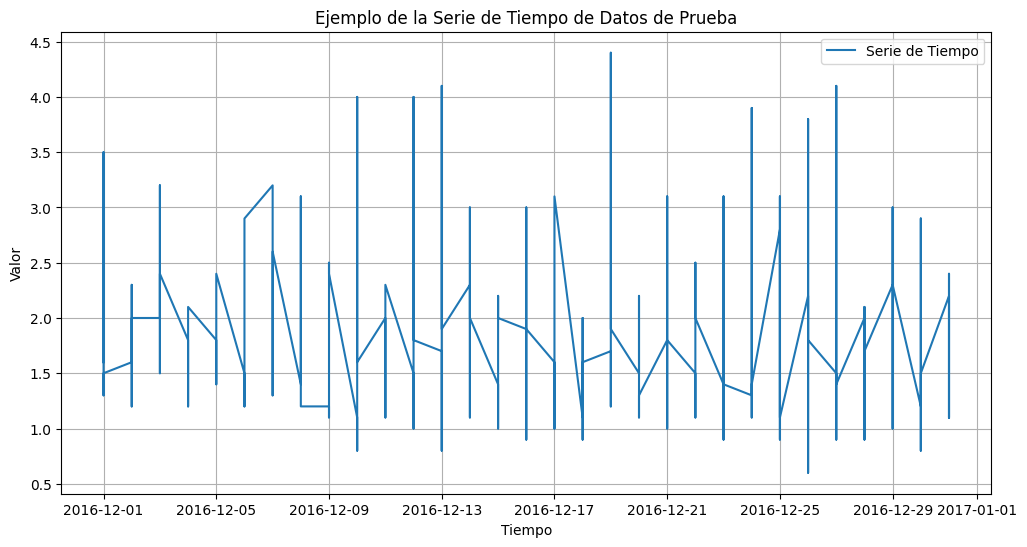

In [4]:
# Paso 3 Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Serie de Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Ejemplo de la Serie de Tiempo de Datos de Prueba')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Paso 4 transformar datos en secuencias
def create_dataset(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definimos el número de pasos de tiempo para la serie temporal
seq_length = 16

# Crear conjuntos de entrenamiento y prueba
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

<ipython-input-5-84bb31324ff9>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i + seq_length])


In [17]:
# Paso 5 Construcción del modelo LSTM
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
# Paso 6: Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='mae')

In [22]:
# Paso 7: Entrenamiento del modelo
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2759
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3128
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3018
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2671
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2789
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2655 
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3103
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2902
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3054 
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2664
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2993 
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3210
Epoch 13/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2965 
Epoch 14/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2933
Epoch 15/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2723


In [23]:
# Paso 8: Evaluación del modelo
Evaluacion = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluacion)
# 100  Evaluación del modelo: 0.7294634580612183
# 200  Evaluación del modelo: 0.7258478403091431
# 500  Evaluación del modelo: 0.7297132015228271
# 700  Evaluación del modelo: 0.7240219712257385
# 800  Evaluación del modelo: 0.7394222021102905
# 900  Evaluación del modelo: 0.7362304925918579
# 1000 Evaluación del modelo: 0.7523610591888428
# 1100 Evaluación del modelo: 0.7352342009544373
# 1500 Evaluación del modelo: 0.7410554885864258
# 2000 Evaluación del modelo: 0.7394229173660278


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7181
Evaluación del modelo: 0.7129143476486206


In [25]:
# Paso 9: Predicción
#print("X_test: \n", X_test)
#print("y_test: \n", y_test)
y_pred = model.predict(X_test)
# Reshape y_pred to be 1D for plotting
y_pred = y_pred.reshape(-1)  # Flatten the array
#print("y_pred: \n", y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


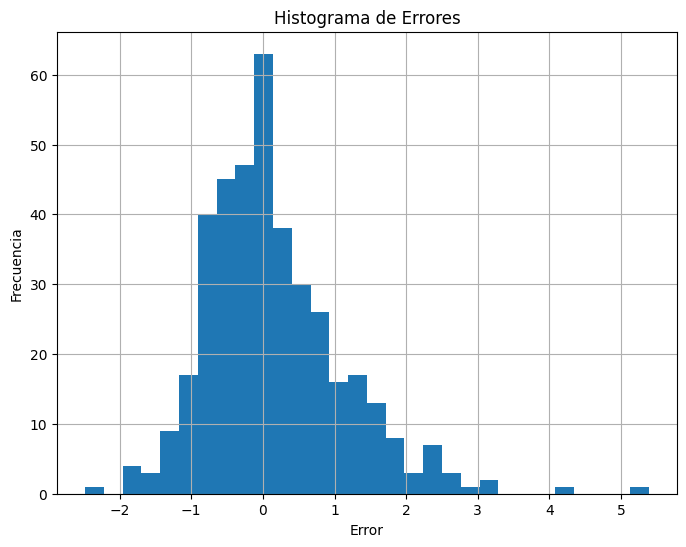

In [26]:
# Calcula los errores
errores = y_test - y_pred

# Crea el histograma
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=30)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.grid(True)
plt.show()

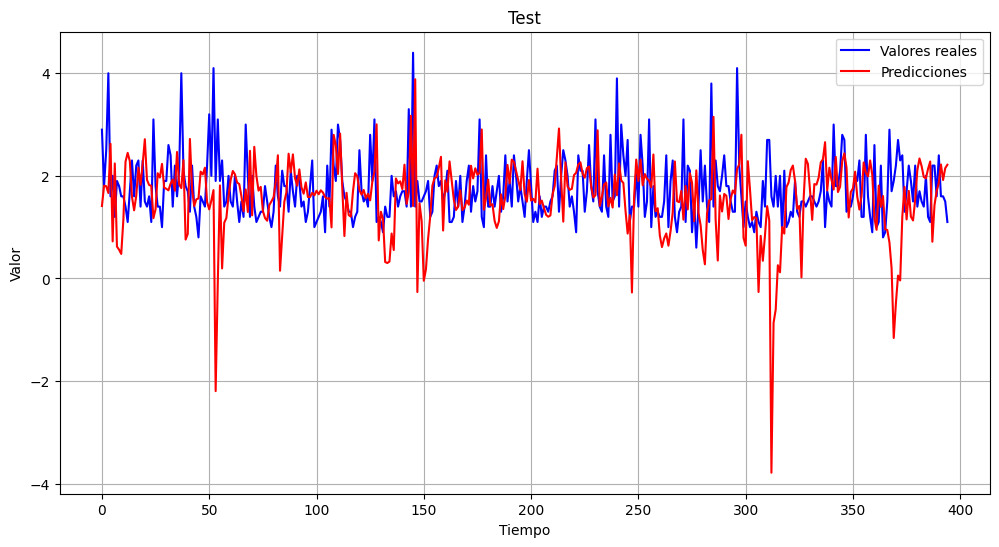

In [27]:
# Paso 10 Ver las predicciones graficamente
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores reales', color='blue')
plt.plot(y_pred, label='Predicciones', color='red')  # Now y_pred is 1D
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 1.7584
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.7051 
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.6291
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.4441 
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.2121
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8631
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4807
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6208
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4387
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4914
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4676
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4366
Epoch 13/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4129
Epoch 14/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4278
Epoch 15/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4007
Ep

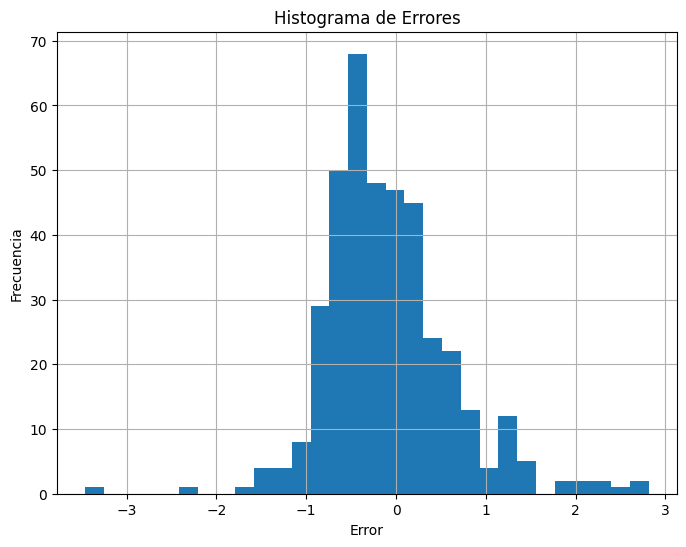

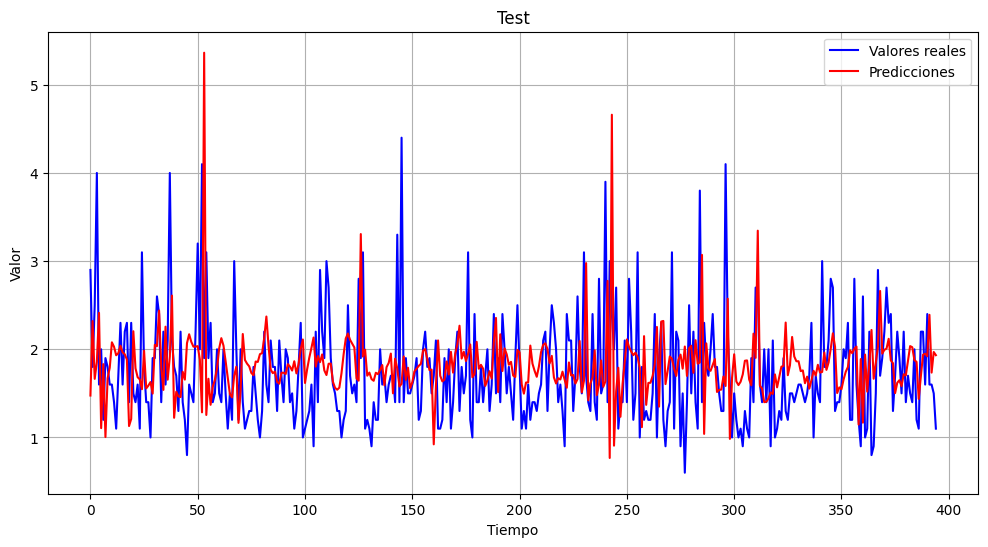

In [15]:
# Cambio de Arquitectura
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

# Paso 7: Entrenamiento del modelo
model.fit(X_train, y_train, epochs=1000)

# Paso 8: Evaluación del modelo
Evaluacion = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluacion)
# Paso 9: Predicción
y_pred = model.predict(X_test)
# Reshape y_pred to be 1D for plotting
y_pred = y_pred.reshape(-1)

# Calcula los errores
errores = y_test - y_pred

# Crea el histograma
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=30)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.grid(True)
plt.show()

# Paso 10 Ver las predicciones graficamente
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores reales', color='blue')
plt.plot(y_pred, label='Predicciones', color='red')  # Now y_pred is 1D
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 1.8719
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.7832
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6763
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5384
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3172
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.9514
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8094
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7465
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7318
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6622
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7260
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7068
Epoch 13/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7133
Epoch 14/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5991
Epoch 15/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6986
Epoc

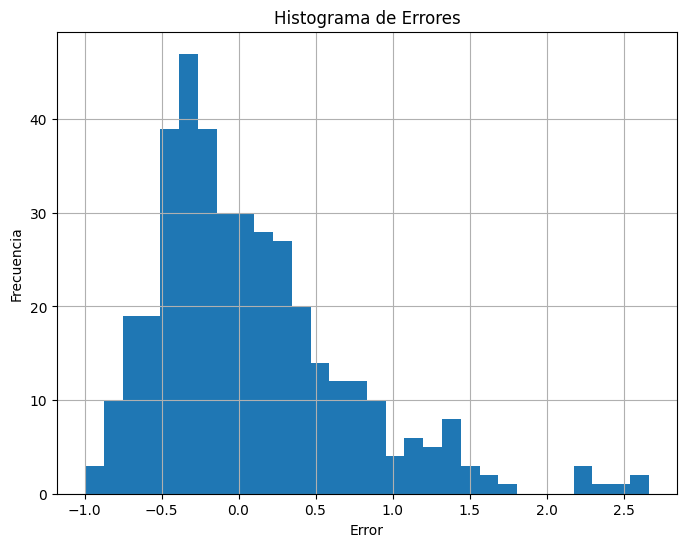

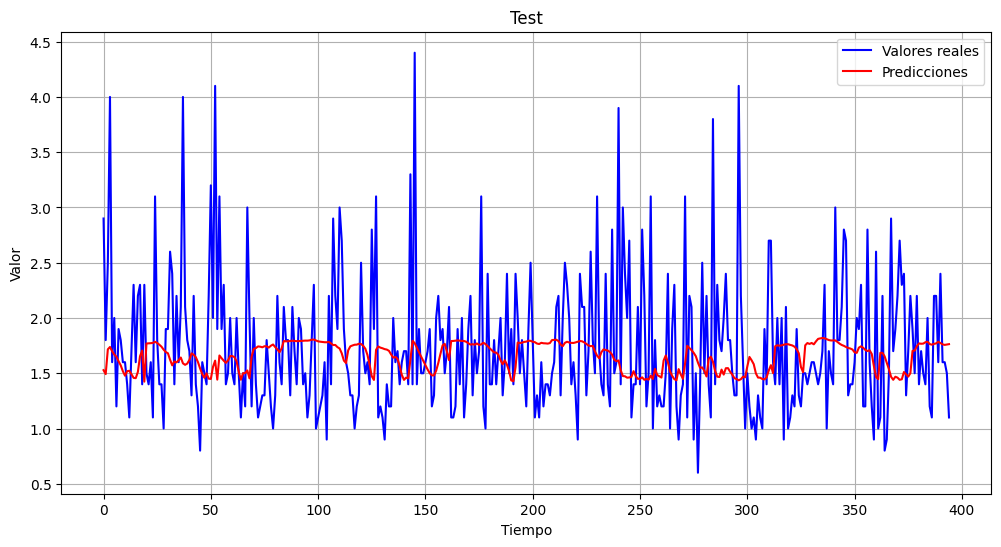

In [16]:
# Arquitectura mejorada
from keras.layers import Dropout
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

# Paso 7: Entrenamiento del modelo
model.fit(X_train, y_train, epochs=1000)

# Paso 8: Evaluación del modelo
Evaluacion = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluacion)
# Paso 9: Predicción
y_pred = model.predict(X_test)
# Reshape y_pred to be 1D for plotting
y_pred = y_pred.reshape(-1)

# Calcula los errores
errores = y_test - y_pred

# Crea el histograma
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=30)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores')
plt.grid(True)
plt.show()

# Paso 10 Ver las predicciones graficamente
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores reales', color='blue')
plt.plot(y_pred, label='Predicciones', color='red')  # Now y_pred is 1D
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

Se han truncado las últimas 5000 líneas del flujo de salida.
Epoch 1503/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1423
Epoch 1504/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1240
Epoch 1505/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1151
Epoch 1506/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1343
Epoch 1507/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1390
Epoch 1508/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1184
Epoch 1509/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1491
Epoch 1510/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1069
Epoch 1511/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1306
Epoch 1512/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1800
Epoch 1513/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1849
Epoch 1514/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1536
Epoch 1515/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1500
Epoch 1516/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

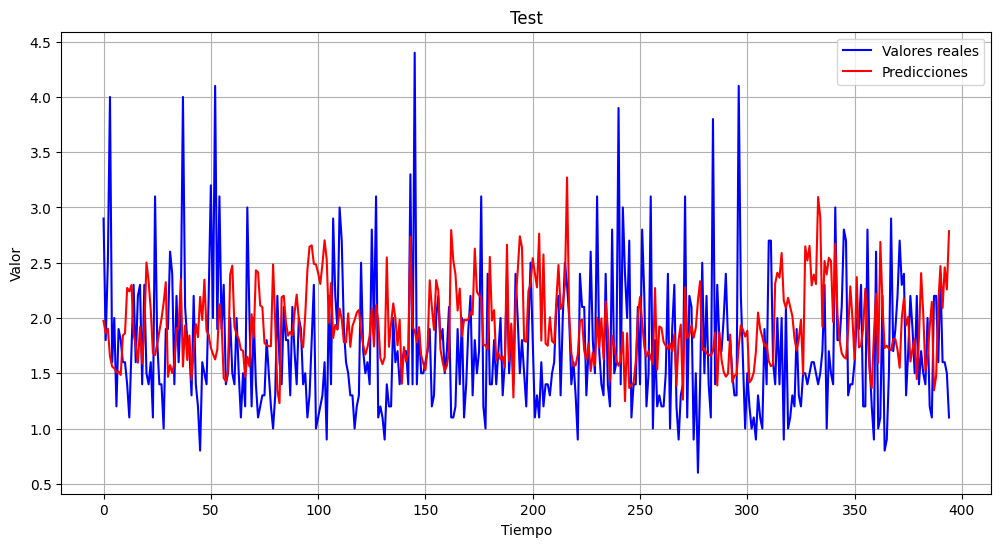

In [ ]:
# Arquitectura mejorada
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Paso 7: Entrenamiento del modelo
model.fit(X_train, y_train, epochs=4000)

# Paso 8: Evaluación del modelo
Evaluacion = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluacion)
# Paso 9: Predicción
y_pred = model.predict(X_test)
# Reshape y_pred to be 1D for plotting
y_pred = y_pred.reshape(-1)

# Paso 10 Ver las predicciones graficamente
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores reales', color='blue')
plt.plot(y_pred, label='Predicciones', color='red')  # Now y_pred is 1D
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()